In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
device

'cuda'

In [5]:
!ls

catdog_data  GAN.py  README.md	カスタムデータセット演習.ipynb


In [6]:
!ls catdog_data/

train  train.zip


In [8]:
!ls catdog_data/train

cats  dogs


In [35]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5,))                                
])

In [36]:
train_dataset = datasets.ImageFolder("./catdog_data/train", transform=transform)

In [37]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
data_iter = iter(train_loader)
imgs, labels = data_iter.next()

In [38]:
labels

tensor([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 0])

In [39]:
imgs.size()

torch.Size([32, 3, 224, 224])

In [40]:
img = imgs[0]

In [41]:
img_permute = img.permute(1, 2, 0)
img_permute = 0.5 * img_permute + 0.5
img_permute = np.clip(img_permute, 0, 1)

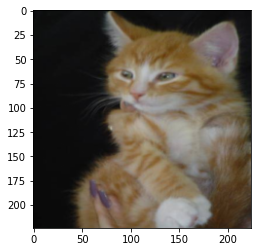

In [42]:
plt.imshow(img_permute)

In [43]:
model = models.resnet18(pretrained=True)

In [44]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [45]:
for param in model.parameters():
    param.requires_grad = False

In [46]:
model.fc = nn.Linear(512, 2)

In [47]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [48]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.0001)

In [50]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss /= len(train_loader)
    running_acc /= len(train_loader)
    losses.append(running_loss)
    accs.append(running_acc)
    print(f"epoch: {epoch}, loss: {running_loss}, acc: {running_acc}")

epoch: 0, loss: 0.663485012948513, acc: 0.5804228186607361
epoch: 1, loss: 0.5916252285242081, acc: 0.7249540686607361
epoch: 2, loss: 0.566759817302227, acc: 0.7513786554336548
epoch: 3, loss: 0.5304904915392399, acc: 0.822150707244873
epoch: 4, loss: 0.5052092000842094, acc: 0.8187040686607361
epoch: 5, loss: 0.47830038145184517, acc: 0.8520220518112183
epoch: 6, loss: 0.46008072048425674, acc: 0.8685661554336548
epoch: 7, loss: 0.44379492476582527, acc: 0.880744457244873
epoch: 8, loss: 0.4236103817820549, acc: 0.884650707244873
epoch: 9, loss: 0.4069017432630062, acc: 0.8920036554336548
epoch: 10, loss: 0.38128527998924255, acc: 0.9110753536224365
epoch: 11, loss: 0.36747587472200394, acc: 0.9267003536224365
epoch: 12, loss: 0.35774756968021393, acc: 0.921875
epoch: 13, loss: 0.3324521780014038, acc: 0.9301470518112183
epoch: 14, loss: 0.3420392647385597, acc: 0.9184283018112183


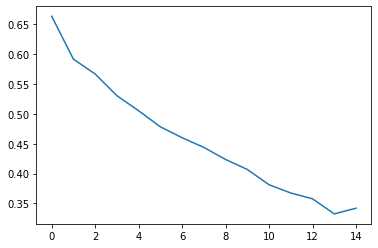

In [51]:
plt.plot(losses)

In [52]:
for i in range(num_epochs):
    accs[i] = accs[i].to('cpu')

In [53]:
accs

[tensor(0.5804),
 tensor(0.7250),
 tensor(0.7514),
 tensor(0.8222),
 tensor(0.8187),
 tensor(0.8520),
 tensor(0.8686),
 tensor(0.8807),
 tensor(0.8847),
 tensor(0.8920),
 tensor(0.9111),
 tensor(0.9267),
 tensor(0.9219),
 tensor(0.9301),
 tensor(0.9184)]

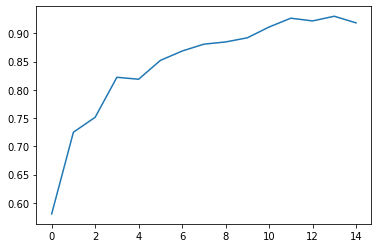

In [54]:
plt.plot(accs)